In [36]:
import pandas as pd # library for data analsysis
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import numpy as np # library to handle data in a vectorized manner
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [14]:
ch_ban_imp_merged = pd.read_csv('ch_ban_imp_merged.csv')
bangalore_merged = pd.read_csv("Ban_top_10_venues.csv")
chennai_merged = pd.read_csv("Ch_top_10_venues.csv")
dist_from_wf = pd.read_csv('dist_from_wf.csv')
# set number of clusters
kclusters = 5

In [15]:
def create_map(neighborhoods, zoom = 10, cluster_info = False, address=None):
    
    if address == None:
        # create map of Bangalore using latitude and longitude values
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode('Bangalore, India')
        latitude = location.latitude
        longitude = location.longitude
    else:
        location = get_location(address)
        latitude = location.latitude
        longitude = location.longitude

    map_neighborhoods = folium.Map(location=[latitude, longitude], zoom_start=zoom)
    
    if cluster_info:
        
        # set color scheme for the clusters
        x = np.arange(kclusters)
        ys = [i + x + (i*x)**2 for i in range(kclusters)]
        colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
        rainbow = [colors.rgb2hex(i) for i in colors_array]

        # add markers to the map
        markers_colors = []
        for lat, lon, poi, cluster in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Location'], neighborhoods['Cluster Labels']):
            label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color=rainbow[int(cluster)-1],
                fill=True,
                fill_color=rainbow[int(cluster)-1],
                fill_opacity=0.7).add_to(map_neighborhoods)
    
    else:
        
        # add markers to map
        for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Location']):
            label = '{}, {}'.format(neighborhood, 'Bangalore')
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [float(lat), float(lng)],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_neighborhoods)

    return map_neighborhoods    

In [16]:
def get_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    return location

In [17]:
create_map(ch_ban_imp_merged, 12, True, 'Whitefield, Bangalore, India')

In [11]:
create_map(ch_ban_imp_merged, 12, True, 'West mambalam, Chennai, India')

In [12]:
create_map(chennai_merged, 11, True, 'Chennai, India')

In [18]:
create_map(bangalore_merged, 11, True)

In [88]:
dist_from_wf.sort_values(by=['Distance']).drop(178, axis=0).head()

,S.No.,Location,Latitude,Longitude,Distance
149,229,Ramagondanahalli,12.955897,77.740583,1.816230
109,166,Kundalahalli,12.968444,77.718784,3.361747
92,143,Kadugodi,12.998577,77.760972,3.425524
64,104,Hoodi,12.991903,77.716201,4.394560
154,238,Samethanahalli,12.979363,77.790733,4.575360


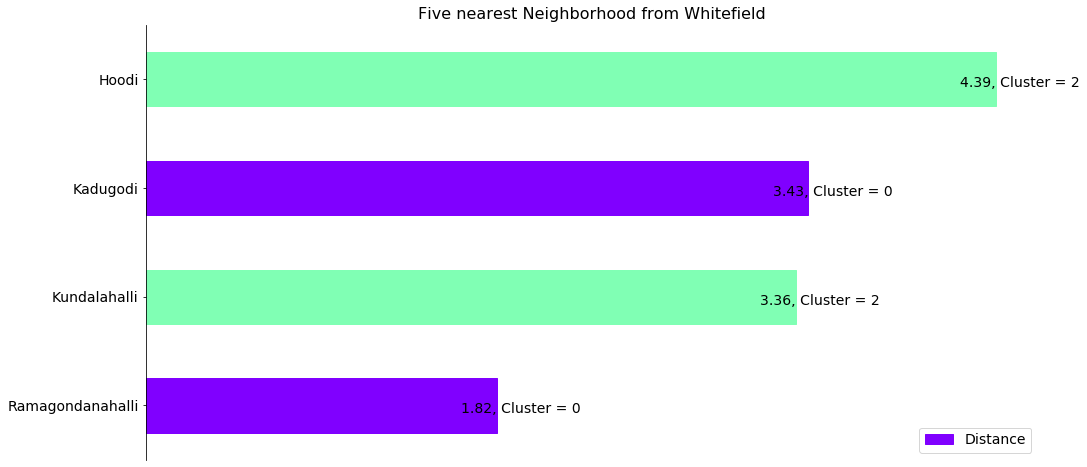

In [128]:
#colors_list = ['#5cb85c', '#5bc0de', '#d9534f']

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 1, 1) 

temp = dist_from_wf.sort_values(by=['Distance']).drop(178, axis=0).head(4)[['Location', 'Distance']]
temp_df = dist_from_wf.sort_values(by=['Distance']).drop(178, axis=0).head(4)[['Location', 'Distance']].set_index('Location')

temp_df_clus = ch_ban_imp_merged[ch_ban_imp_merged['Location'].
                                 isin(dist_from_wf.sort_values(by=['Distance']).
                                      drop(178, axis=0).head(4)['Location'])][['Location', 'Cluster Labels']].set_index('Location')
#temp_df_clus.loc['Hoodi', 'Cluster Labels']

x = np.arange(len(temp_df))
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

ax = temp_df.plot(kind = 'barh',
                    #width = 0.8, 
                    figsize=(16, 8),
                    #grid=True,
                    ax = ax0)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for rect, clus in zip(ax.patches, temp_df_clus['Cluster Labels']):
    #print (type(loca), type(clus))
    rect.set_color(rainbow[clus])
    ax.annotate('{}'.format(str(round(rect.get_width(), 2)))+ ', Cluster = ' + str(clus) ,
                    xy=(rect.get_width() + rect.get_height() / 4, rect.get_y() + rect.get_height() / 4),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 14)

ax0.set_title("Five nearest Neighborhood from Whitefield", fontsize=16)
ax0.legend(loc='best', fontsize=14)

ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.get_xaxis().set_ticks([])
ax0.set_ylabel("")
#ax0.set_xlabel("Distance", fontsize=14)
plt.savefig('Five_nearest_Neighborhood_from_Whitefield.png')

In [122]:
temp_df_clus = ch_ban_imp_merged[ch_ban_imp_merged['Location'].
                                 isin(dist_from_wf.sort_values(by=['Distance']).
                                      drop(178, axis=0).head()['Location'])][['Location', 'Cluster Labels']].set_index('Location')
temp_df_clus#.loc['Hoodi', 'Cluster Labels']
temp_df.index.values

temp_df_clus['Cluster Labels']

Location
Hoodi               0
Kadugodi            2
Kundalahalli        0
Ramagondanahalli    2
Name: Cluster Labels, dtype: int64

In [87]:
ch_ban_imp_merged.loc[ch_ban_imp_merged['Cluster Labels'] == 2, ch_ban_imp_merged.columns[[2] + list(range(6, ch_ban_imp_merged.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kodambakkam,Jewelry Store,Juice Bar,Bakery,Yoga Studio,Lounge,Department Store,Park,Electronics Store,Fast Food Restaurant,Chinese Restaurant
3,Kodambakkam West,Jewelry Store,Juice Bar,Bakery,Yoga Studio,Lounge,Department Store,Park,Electronics Store,Fast Food Restaurant,Chinese Restaurant
6,Velacheri,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Sandwich Place,Café,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Multiplex
9,Bhattarahalli,Café,Hotel,Pizza Place,Indian Restaurant,Event Service,Electronics Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
11,Doddanekkundi,Department Store,Coffee Shop,Sandwich Place,Indian Restaurant,Café,BBQ Joint,Breakfast Spot,Mediterranean Restaurant,Fast Food Restaurant,Burrito Place
12,H M T,Department Store,Shopping Plaza,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Asian Restaurant,Restaurant,Electronics Store,Dry Cleaner,Dumpling Restaurant
14,Industrial Estate,Indian Restaurant,Gym,Sporting Goods Shop,Bakery,Breakfast Spot,Auto Workshop,Office,Grocery Store,Café,Performing Arts Venue
15,Kadugodi,Hotel,Train Station,Pizza Place,Bus Station,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Service
19,Mahadevapura,Clothing Store,Coffee Shop,French Restaurant,Fast Food Restaurant,Donut Shop,Café,Bus Station,Shopping Mall,Bowling Alley,Lounge
20,Marathahalli Colony,Tea Room,Coffee Shop,Airport Terminal,History Museum,Fast Food Restaurant,Clothing Store,Indian Restaurant,Mexican Restaurant,Fried Chicken Joint,Electronics Store


In [102]:
ch_ban_imp_merged[ch_ban_imp_merged['Location'].isin(dist_from_wf.sort_values(by=['Distance']).drop(178, axis=0).head()['Location'])]

,Cluster Labels,S.No.,Location,Pincode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,0,104,Hoodi,560048,12.991903,77.716201,Indian Restaurant,Hotel,Coffee Shop,Diner,Cocktail Bar,Soccer Field,Platform,Brewery,Japanese Restaurant,English Restaurant
15,2,143,Kadugodi,560067,12.998577,77.760972,Hotel,Train Station,Pizza Place,Bus Station,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Service
18,0,166,Kundalahalli,560037,12.968444,77.718784,Indian Restaurant,Fast Food Restaurant,Hotel,Soccer Field,Asian Restaurant,Breakfast Spot,Food,Market,Food Court,Salon / Barbershop
23,2,229,Ramagondanahalli,560066,12.955897,77.740583,Pizza Place,Multiplex,Shopping Mall,Restaurant,Food Court,Hotel,Café,Indian Restaurant,Bookstore,Rajasthani Restaurant


In [95]:
dist_from_wf[dist_from_wf['Distance'] < 10].reset_index()# .sort_values(by=['Distance']).drop(178, axis=0).head(6)['Location']

,index,S.No.,Location,Latitude,Longitude,Distance
0,11,15,Avalahalli,13.035278,77.736565,7.401326
1,27,43,Bhattarahalli,13.025800,77.714279,7.308237
2,33,52,C.V.Raman Nagar,12.985648,77.664977,9.365897
3,50,76,Doddanekkundi,12.979357,77.694669,6.071516
4,59,93,H M T,13.019494,77.766052,5.792500
5,64,104,Hoodi,12.991903,77.716201,4.394560
6,73,117,Industrial Estate,12.990879,77.705126,5.381099
7,90,141,Kacharakanahalli,12.995765,77.814568,7.603677
8,92,143,Kadugodi,12.998577,77.760972,3.425524
9,106,161,Krishnarajapuram,13.000509,77.675394,8.759636


In [89]:
ch_ban_imp_merged

,Cluster Labels,S.No.,Location,Pincode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,3,Adyar,600020,13.006450,80.257779,Indian Restaurant,Café,Pizza Place,Department Store,Fast Food Restaurant,North Indian Restaurant,Electronics Store,Juice Bar,Rock Club,Ice Cream Shop
1,0,23,Ashok Nagar,600083,13.040073,80.215925,Indian Restaurant,Pizza Place,Department Store,Bakery,Yoga Studio,Sculpture Garden,Sandwich Place,Café,Chinese Restaurant,Coffee Shop
2,2,112,Kodambakkam,600024,13.049207,80.224283,Jewelry Store,Juice Bar,Bakery,Yoga Studio,Lounge,Department Store,Park,Electronics Store,Fast Food Restaurant,Chinese Restaurant
3,2,113,Kodambakkam West,600024,13.049207,80.224283,Jewelry Store,Juice Bar,Bakery,Yoga Studio,Lounge,Department Store,Park,Electronics Store,Fast Food Restaurant,Chinese Restaurant
4,0,144,Mambalam East,600033,13.038066,80.227775,Indian Restaurant,Clothing Store,Jewelry Store,Women's Store,Park,Snack Place,South Indian Restaurant,Boutique,Italian Restaurant,Miscellaneous Shop
5,0,145,Mambalam R S,600033,13.038066,80.227775,Indian Restaurant,Clothing Store,Jewelry Store,Women's Store,Park,Snack Place,South Indian Restaurant,Boutique,Italian Restaurant,Miscellaneous Shop
6,2,280,Velacheri,600042,12.987911,80.223195,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Sandwich Place,Café,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Multiplex
7,0,296,West Mambalam,600033,13.042732,80.227078,Clothing Store,Indian Restaurant,Jewelry Store,South Indian Restaurant,BBQ Joint,Café,Department Store,Convenience Store,Electronics Store,Boutique
8,3,15,Avalahalli,560026,13.035278,77.736565,Breakfast Spot,Lake,Athletics & Sports,Yoga Studio,Dry Cleaner,Flea Market,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market
9,2,43,Bhattarahalli,560049,13.025800,77.714279,Café,Hotel,Pizza Place,Indian Restaurant,Event Service,Electronics Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant


In [90]:
chosen_loc = dist_from_wf[dist_from_wf['Distance'] < 10]
chosen_loc_cluster = bangalore_merged[bangalore_merged['Location'].isin(chosen_loc['Location'])]
#dist_from_wf.to_csv('dist_from_wf.csv', index=False)
create_map(chosen_loc_cluster, 12, True, 'Whitefield, Bangalore')#(wlat,wlon)

In [91]:
bangalore_merged

,S.No.,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Adugodi,560030,12.942847,77.610416,1.0,Indian Restaurant,Lounge,Dessert Shop,Café,Coffee Shop,Juice Bar,Multiplex,Bookstore,Donut Shop,Brewery
1,5,Amruthahalli,560092,13.066513,77.596624,1.0,Indian Restaurant,Bus Station,Hotel,Pizza Place,Brewery,Ice Cream Shop,Bubble Tea Shop,Fast Food Restaurant,Chinese Restaurant,Department Store
2,6,Anandnagar,560024,13.033377,77.589523,1.0,Indian Restaurant,Tennis Court,Breakfast Spot,Park,Snack Place,Motorcycle Shop,Café,Fast Food Restaurant,Pizza Place,Coffee Shop
3,7,Anekal,562106,12.799122,77.680604,0.0,ATM,Flower Shop,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Event Space,Event Service,English Restaurant,Electronics Store
4,9,Arabic College,560045,13.030009,77.620866,0.0,Department Store,Shopping Mall,Pizza Place,North Indian Restaurant,Optical Shop,Indian Restaurant,Pool Hall,Dumpling Restaurant,Dive Bar,Donut Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,287,Yadavanahalli,562107,12.789855,77.751454,0.0,Diner,Hotel Bar,Resort,Restaurant,Cosmetics Shop,Dive Bar,Field,Fast Food Restaurant,Farmers Market,Event Space
161,289,Yelachenahalli,560078,12.897971,77.570085,0.0,Café,Pizza Place,Department Store,Athletics & Sports,Metro Station,Motorcycle Shop,Fast Food Restaurant,Farmers Market,Event Space,Event Service
162,290,Yelahanka,560064,13.100698,77.596345,0.0,Café,Clothing Store,Food Truck,Chinese Restaurant,Multiplex,Train Station,Ice Cream Shop,Smoke Shop,Vegetarian / Vegan Restaurant,American Restaurant
163,291,Yelahanka Satellite Town,560106,13.089139,77.582717,1.0,Indian Restaurant,Pizza Place,Resort,Dessert Shop,Bus Station,Yoga Studio,Electronics Store,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant


In [139]:
chennai_imp_loc = 'Adyar|Kodambakkam|Mambalam|Velacheri|Ashok Nagar'
temp_val = chennai_merged[chennai_merged['Location'].str.contains(chennai_imp_loc)][['Location', 'Cluster Labels']]#.set_index('Location')

In [150]:
temp_val.groupby('Cluster Labels')['Location'].apply(lambda x: ", ".join(x)).to_frame()

,Location
Cluster Labels,
0.0,"Kodambakkam, Kodambakkam West, Velacheri"
3.0,"Adyar, Ashok Nagar, Mambalam East, Mambalam R S, West Mambalam"


# Methodology

In this section first the zonal information data is collected from the mentioned website in the data section. Beautiful soup is used to extract data from HTML, which is useful for web scraping. First inspect the webpage to identify the class attribute for the table of interest. Raise a get request to fetch the raw HTML content and parse the content. Read the table of interest with the identified class attribute and all table inforamtion is extracted. 

After obtaining the zonal information, latitude and longitude location data for each zone is obtained using Geopy, Nominatim package. The location data is visually rendered on a map using Follium. 

Each and every neighborhood location is explored using foursquare API requests and the JSON response from the API request is processed to obtain only relavant information. The Obtained venue data is explored for total number of venues and unique categories. 

One hot coding is done to convert the unique catergories to venues to numberical data and the average occurance of a particular category of venue is obtained. Most commonly occuring venues in a given neighborhood are identified and a dataframe consisting of the neighborhood and its corresponding 10 most commonly occuring venues is prepared. 

K-Means clustering algorthims is used to group the venues based on the similaries of the occurance of venues. In this project a cluser value of 5 is chosen to group the neighborhoods into 5 different categories. The Clustered information is then visually rendered using follium.

Individual cluser groups are explored for their similaries and their descriptives.